##Seminar 5: Deep Networks

In [1]:
import numpy as np
import theano
import theano.tensor as T
import lasagne
import cPickle as pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy.misc import imread, imsave, imresize
from lasagne.utils import floatX

/usr/local/lib/python2.7/dist-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
from lasagne.layers import InputLayer
from lasagne.layers import DenseLayer
from lasagne.layers import NonlinearityLayer
from lasagne.layers import DropoutLayer
from lasagne.layers import Pool2DLayer as PoolLayer
from lasagne.layers import Conv2DLayer as ConvLayer
from lasagne.nonlinearities import rectify, softmax

IMAGE_W = 224

#vgg19 model
#http://www.robots.ox.ac.uk/~vgg/research/very_deep/
def build_model():
    net = {}
    net['input'] = InputLayer((None, 3, 224, 224))
    net['conv1_1'] = ConvLayer(net['input'], 64, 3, pad=1, flip_filters=False)
    net['conv1_2'] = ConvLayer(net['conv1_1'], 64, 3, pad=1, flip_filters=False)
    net['pool1'] = PoolLayer(net['conv1_2'], 2)
    net['conv2_1'] = ConvLayer(net['pool1'], 128, 3, pad=1, flip_filters=False)
    net['conv2_2'] = ConvLayer(net['conv2_1'], 128, 3, pad=1, flip_filters=False)
    net['pool2'] = PoolLayer(net['conv2_2'], 2)
    net['conv3_1'] = ConvLayer(net['pool2'], 256, 3, pad=1, flip_filters=False)
    net['conv3_2'] = ConvLayer(net['conv3_1'], 256, 3, pad=1, flip_filters=False)
    net['conv3_3'] = ConvLayer(net['conv3_2'], 256, 3, pad=1, flip_filters=False)
    net['conv3_4'] = ConvLayer(net['conv3_3'], 256, 3, pad=1, flip_filters=False)
    net['pool3'] = PoolLayer(net['conv3_4'], 2)
    net['conv4_1'] = ConvLayer(net['pool3'], 512, 3, pad=1, flip_filters=False)
    net['conv4_2'] = ConvLayer(net['conv4_1'], 512, 3, pad=1, flip_filters=False)
    net['conv4_3'] = ConvLayer(net['conv4_2'], 512, 3, pad=1, flip_filters=False)
    net['conv4_4'] = ConvLayer(net['conv4_3'], 512, 3, pad=1, flip_filters=False)
    net['pool4'] = PoolLayer(net['conv4_4'], 2)
    net['conv5_1'] = ConvLayer(net['pool4'], 512, 3, pad=1, flip_filters=False)
    net['conv5_2'] = ConvLayer(net['conv5_1'], 512, 3, pad=1, flip_filters=False)
    net['conv5_3'] = ConvLayer(net['conv5_2'], 512, 3, pad=1, flip_filters=False)
    net['conv5_4'] = ConvLayer(net['conv5_3'], 512, 3, pad=1, flip_filters=False)
    net['pool5'] = PoolLayer(net['conv5_4'], 2)
    net['fc6'] = DenseLayer(net['pool5'], num_units=4096)
    net['fc6_dropout'] = DropoutLayer(net['fc6'], p=0.5)
    net['fc7'] = DenseLayer(net['fc6_dropout'], num_units=4096)
    net['fc7_dropout'] = DropoutLayer(net['fc7'], p=0.5)
    net['fc8'] = DenseLayer(net['fc7_dropout'], num_units=1000, nonlinearity=None)
    net['prob'] = NonlinearityLayer(net['fc8'], softmax)
    return net

In [3]:
MEAN_VALUES = np.array([104, 117, 123])
IMAGE_W = 224

def preprocess(img):
    img = img[:, :, :: -1].astype(float)
    for i in xrange(3):
        img[:,:,i] -= MEAN_VALUES[i]
    return np.transpose(img, (2, 0, 1))[None, :, :, :]

def deprocess(img):
    tr_img = np.transpose(img, (2, 3, 1, 0))
    tr_img = tr_img.reshape(tr_img.shape[:-1])
    for i in xrange(3):
        tr_img[:,:, i] += MEAN_VALUES[i]
    return tr_img[:, :, :: -1].astype(np.uint8)

img = (np.random.rand(IMAGE_W, IMAGE_W, 3) * 256).astype(np.uint8)
if not np.all(deprocess(preprocess(img)) == img):
    print 'Either your implementation is incorrect or floating point comparison is ripping your off'

In [4]:
#classes' names are stored here
classes = pickle.load(open('classes.pkl'))
#for example, 10th class is ostrich:
print classes[9]

ostrich, Struthio camelus


In [5]:
#load model weights
#vgg19.npz is available for download at
#https://yadi.sk/d/UQPXeM_GqEmGg
net = build_model()
params = np.load('vgg19.npz')['params']
for i in range(32,len(params)):
    params[i] = params[i].T
lasagne.layers.set_all_param_values(net.values(), params)

In [6]:
input_image = T.tensor4('input')
output = lasagne.layers.get_output(net['prob'], input_image)
prob = theano.function([input_image], output) 

In [7]:
! ls

albatross.jpg	mnist.pyc		   theano-tutorial-handout (3).ipynb
catsvsdogs	Seminar5.ipynb		   theano-tutorial-handout.ipynb
catsvsdogs.zip	t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
classes.pkl	t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz
mnist.py	test_labels.pickle	   vgg19.npz


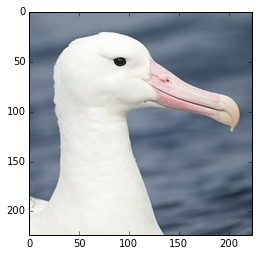

top-5 classes are:
0.968934	albatross
0.030583	goose
0.000429	American egret
0.000012	crane
0.000009	ptarmigan


In [8]:
img = imread('albatross.jpg')
plt.imshow(img)
plt.show()

p = prob(preprocess(img))

labels = p.ravel().argsort()[-1:-6:-1]
print 'top-5 classes are:'
for l in labels:
    print '%3f\t%s' % (p.ravel()[l], classes[l].split(',')[0])

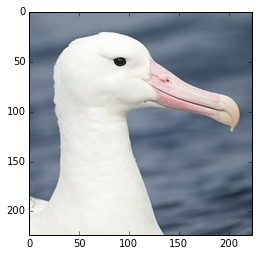

(224, 224, 3)

In [29]:
img = imread('albatross.jpg')
plt.imshow(img)
plt.show()

img.shape


In [32]:
d1 = imread('d001.jpg')
d1.shape

(224, 224, 3)

Now, use vgg19 network and your knowledge of machine learning to classify cats and dogs!

data: https://yadi.sk/d/m6ZO4BvWqEmR9

**catsvsdogs/val/** validation images

**catsvsdogs/val_labels.pickle** labels for validation images

**catsvsdogs/test/** test images

You have to implement classification algorithm, tune it on validation images save output of your algorithm on test images in form of pickled file, as shown below. Your results, as well as this notebook, have to be attached to your letter to rdlclass@yandex.ru

I expect classification accuracy >95%, or >90% at least

Cheating is not allowed

In [82]:
path = '/home/masha/Desktop/Shad4/cats'
os.chdir(path)
!dir

001.jpg  003.jpg  005.jpg  015.jpg  018.jpg  030.jpg  034.jpg  047.jpg
002.jpg  004.jpg  006.jpg  017.jpg  019.jpg  031.jpg  039.jpg


In [83]:
files = os.listdir(path)
features_for_all_images_cats = []
files
for f in files:
    img = imread(f)
    p = prob(preprocess(img))
    features_for_all_images_cats.append(p)


In [84]:
path = '/home/masha/Desktop/Shad4/dogs'
os.chdir(path)
!dir

000.jpg  014.jpg  022.jpg  024.jpg  026.jpg  028.jpg  032.jpg  044.jpg
011.jpg  020.jpg  023.jpg  025.jpg  027.jpg  029.jpg  033.jpg


In [85]:
files = os.listdir(path)
features_for_all_images_dogs = []
files
for f in files:
    img = imread(f)
    p = prob(preprocess(img))
    features_for_all_images_dogs.append(p)

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [86]:
X_cats = np.vstack(features_for_all_images_cats)
X_dogs = np.vstack(features_for_all_images_dogs)
Y_cats = np.zeros(X_cats.shape[0])
Y_dogs = np.ones(X_cats.shape[0])

In [87]:
X = np.vstack([X_cats,X_dogs])
Y = np.hstack([Y_cats,Y_dogs])

In [88]:
X.shape, Y.shape

((30, 1000), (30,))

In [89]:
from sklearn.utils import shuffle
X, Y = shuffle(X, Y, random_state = 123)

In [90]:
model = LogisticRegression()
model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [47]:
def classify(img):
    p = prob(preprocess(img))
    if model.predict(p) < 0.5:
        return 'cat'
    else:
        return 'dog'

In [81]:
img = imread('000.jpg')
classify(img)

'cat'

cat


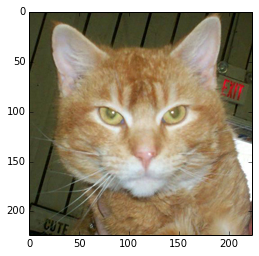

dog


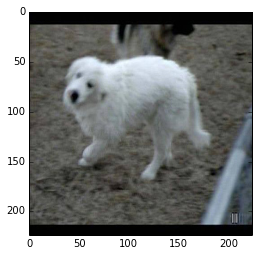

dog


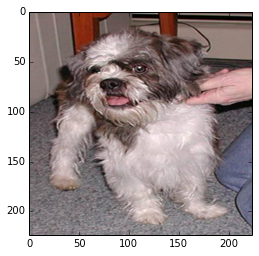

cat


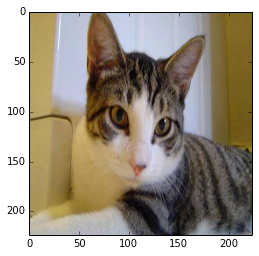

dog


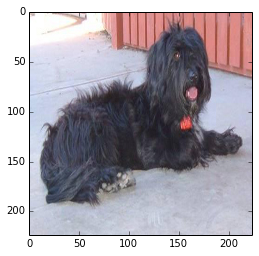

dog


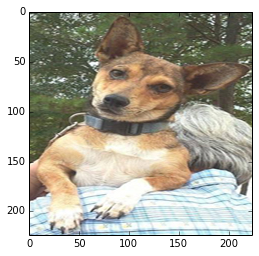

dog


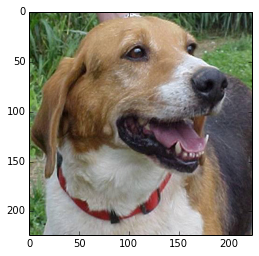

dog


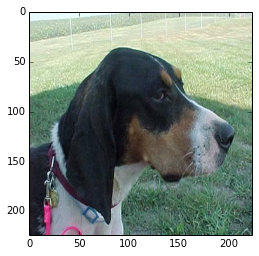

cat


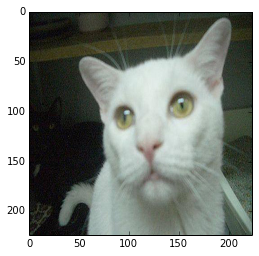

dog


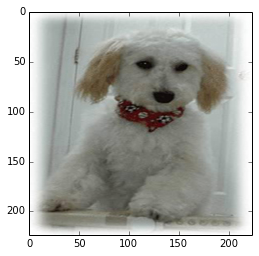

In [91]:
path = '/home/masha/Desktop/Shad4/test/'
files = os.listdir(path)

labels = []

for f in files:
    img = imread(path + f)
    label = classify(img)
    print(label)
    plt.imshow(img)
    plt.show()
    labels.append(label)
    
#pickle.dump(labels, open('test_labels.pickle', 'wb'))

##Visualizations

It is easy to visualize the weights of the first convolutional layer:

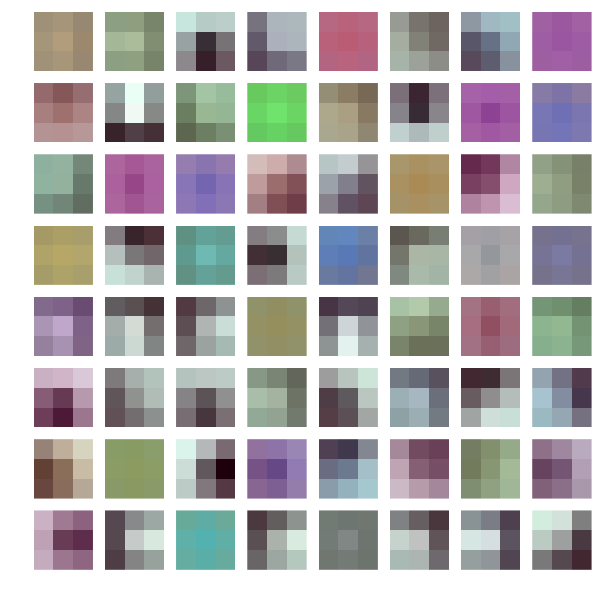

In [19]:
w = net['conv1_1'].W.eval().copy()
w -= w.min()
w /= w.max()
plt.figure(figsize=(10, 10))
for i in range(8):
    for j in range(8):
        n = 8*j + i
        if n < 64:
            plt.subplot(8,8,n)
            plt.axis('off')
            plt.imshow(w[n,:,:,:].transpose((1,2,0)), interpolation='none')
plt.show()

On higher layers, filters have more than 3 channels, so it is impossible to visualize them directly. However, of we want to understand something about features on higher layers, it is possible to visualize them via optimization of the input image.

Namely, we can solve the following problem

$$J=\mathrm{argmax} \left( n^i_{xyc}(I) \right)$$

there $n^i_{xyc}$ is the activation of neuron on $i$'th layer in position $x$,$y$,$c$ given input image $I$.
Basically, $J$ is the answer on a question "what our neuron is looking for?"

In [20]:
generated_image = theano.shared(floatX(np.zeros((1, 3, IMAGE_W, IMAGE_W))))
gen_features = lasagne.layers.get_output(net.values(), generated_image)
gen_features = {k: v for k, v in zip(net.keys(), gen_features)}

layer_name = 'pool1'
c = 0
blob_width = gen_features[layer_name].shape[2]
x = blob_width/2
y = blob_width/2
loss = 1e10*(1e1 - gen_features[layer_name][0, c, x, y])**2

grad = T.grad(loss, generated_image)

tv_loss = T.mean(T.abs_(generated_image[:,:,1:,1:] - generated_image[:,:,:-1,1:]) +
                 T.abs_(generated_image[:,:,1:,1:] - generated_image[:,:,1:,:-1]))

f_loss = theano.function([], loss + 1.0 * tv_loss)
f_grad = theano.function([], grad)

# Helper functions to interface with scipy.optimize
def eval_loss(x0):
    x_ = floatX(x0.reshape((1, 3, IMAGE_W, IMAGE_W)))
    generated_image.set_value(x_)
    return f_loss().astype('float64')

def eval_grad(x0):
    x0 = floatX(x0.reshape((1, 3, IMAGE_W, IMAGE_W)))
    generated_image.set_value(x0)
    return np.array(f_grad()).flatten().astype('float64')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: DeprecationWarning: Division of two integer types with x / y is deprecated, please use x // y for an integer division.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: DeprecationWarning: Division of two integer types with x / y is deprecated, please use x // y for an integer division.


In [21]:
#run input image optimization via scipy.optimize.fmin_l_bfgs_b
generated_image.set_value(floatX(np.zeros((1, 3, IMAGE_W, IMAGE_W))))
x0 = generated_image.get_value().astype('float64')
status = scipy.optimize.fmin_l_bfgs_b(eval_loss, x0.flatten(), fprime=eval_grad, maxfun=20)
x0 = generated_image.get_value().astype('float64')

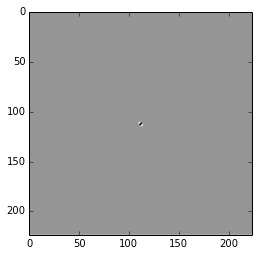

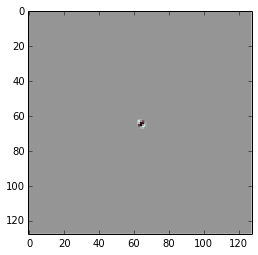

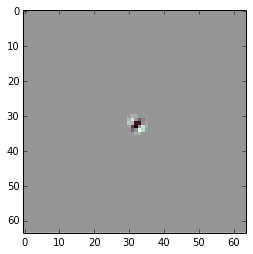

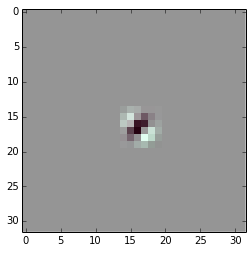

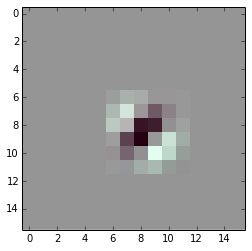

In [22]:
#show the results
w = IMAGE_W
for d in [112, 64, 32, 16, 8]:
    pic = deprocess(x0)[w/2-d:w/2+d,w/2-d:w/2+d,:]
    pic -= pic.min()
    pic /= pic.max()
    plt.imshow(pic, interpolation='None')
    plt.show()

Optional problem:
Adjust the code above to work with neurons on fc8 layer.


fc8 neurons are wired to output classes, so maximization of neuron value will produce an image which contains as much of given class (from the point of view of neural network) as possible. 

Examples of such images are shown at:

http://yosinski.com/deepvis

http://googleresearch.blogspot.ru/2015/06/inceptionism-going-deeper-into-neural.html

http://auduno.com/post/125362849838/visualizing-googlenet-classes